#  Random Forest 22 March

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Reading the data

In [8]:
df = pd.read_csv(r"C:\Users\rezaa\Videos\Captures\11.Machine Learning\2.Classification\22nd, - ensamble\5. RANDOM FOREST\Social_Network_Ads.csv")

X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Spliting and standerization of data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Trainning the model

In [7]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100,max_samples=.8,max_depth=7)
model_RF.fit(X_train, y_train);

## Accuracy and confusion metrix

In [5]:
y_pred_train = model_RF.predict(X_train)
y_pred_test = model_RF.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print(f'Bias = {accuracy_score(y_train, y_pred_train)}')
print(f'Variance = {accuracy_score(y_test, y_pred_test)}')
print(confusion_matrix(y_test, y_pred_test))

Bias = 0.95
Variance = 0.95
[[55  3]
 [ 1 21]]


## Ploting the classifiaction

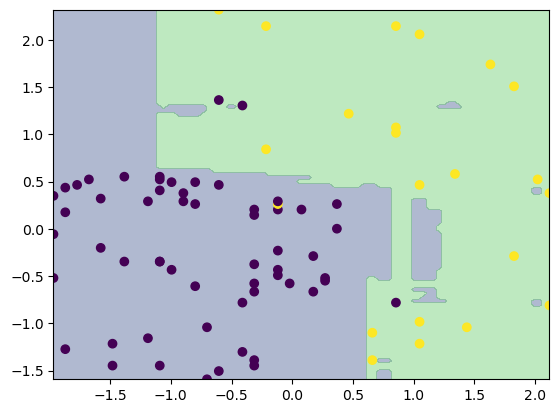

In [6]:
a = np.linspace(np.min(X_train[:,0]),np.max(X_train[:,0]),100)
b = np.linspace(np.min(X_train[:,1]),np.max(X_train[:,1]),100)
aa, bb = np.meshgrid(a,b)
z = model_RF.predict(np.array([aa.ravel(),bb.ravel()]).transpose()).reshape(len(a),len(b))
plt.contourf(aa,bb,z,levels=1,cmap='viridis',alpha=.4)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='viridis')
plt.show()